In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


# Removing paramteres which are not important as per the given question

In [5]:

train = train.drop(['ID','industry_code','occupation_code','household_stat','veterans_admin_questionnaire','mig_year','country_of_birth_own','country_of_birth_father',
             'country_of_birth_mother','migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg',
             'old_residence_reg','importance_of_record'],axis=1)

In [6]:
test = test.drop(['ID','industry_code','occupation_code','household_stat','veterans_admin_questionnaire','mig_year','country_of_birth_own','country_of_birth_father',
             'country_of_birth_mother','migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg',
             'old_residence_reg','importance_of_record'],axis=1)

In [7]:
train.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,total_employed,vet_benefit,gains,losses,stocks_status
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,1.956067,1.515854,435.926887,36.881737,194.533420
std,22.306738,0.555562,276.757327,24.397963,2.365154,0.850853,4696.359500,270.383302,1956.375501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,50.000000,0.000000,0.000000,52.000000,4.000000,2.000000,0.000000,0.000000,0.000000
max,90.000000,2.000000,9999.000000,52.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    209499 non-null  int64 
 1   gender                 209499 non-null  object
 2   education              209499 non-null  object
 3   class                  104254 non-null  object
 4   education_institute    13302 non-null   object
 5   marital_status         209499 non-null  object
 6   race                   209499 non-null  object
 7   is_hispanic            209499 non-null  object
 8   employment_commitment  209499 non-null  object
 9   unemployment_reason    6520 non-null    object
 10  employment_stat        209499 non-null  int64 
 11  wage_per_hour          209499 non-null  int64 
 12  is_labor_union         20079 non-null   object
 13  working_week_per_year  209499 non-null  int64 
 14  industry_code_main     209499 non-null  object
 15  

# Checking the significance of remaining categorical parameters

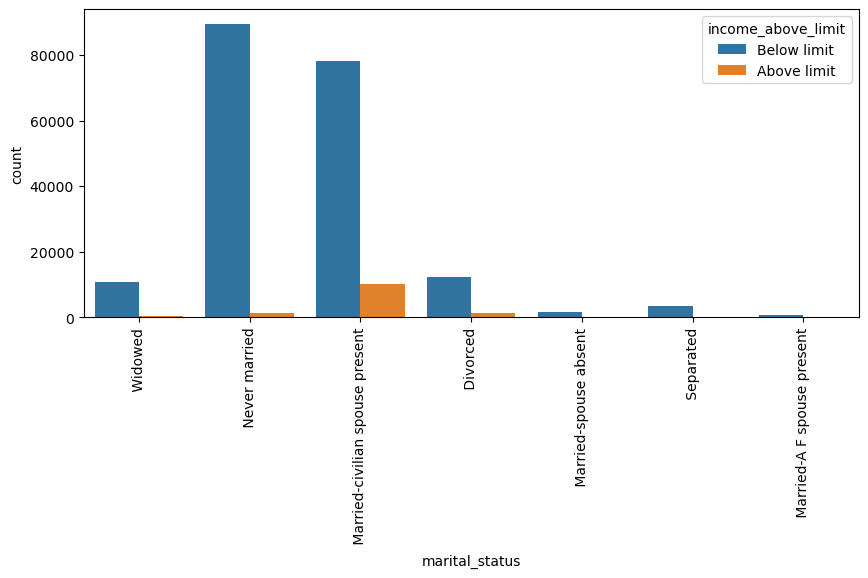

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.marital_status,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

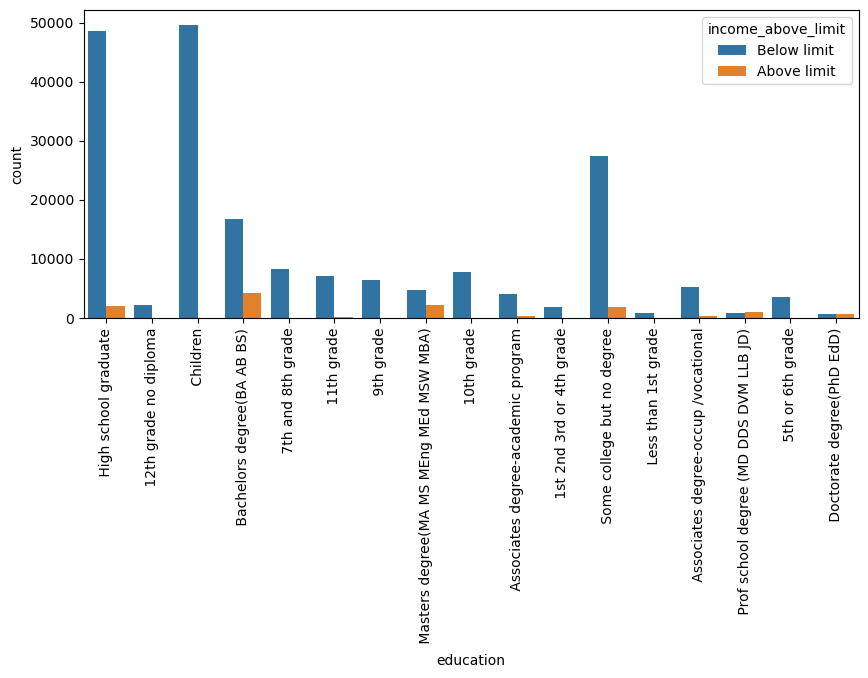

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.education,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

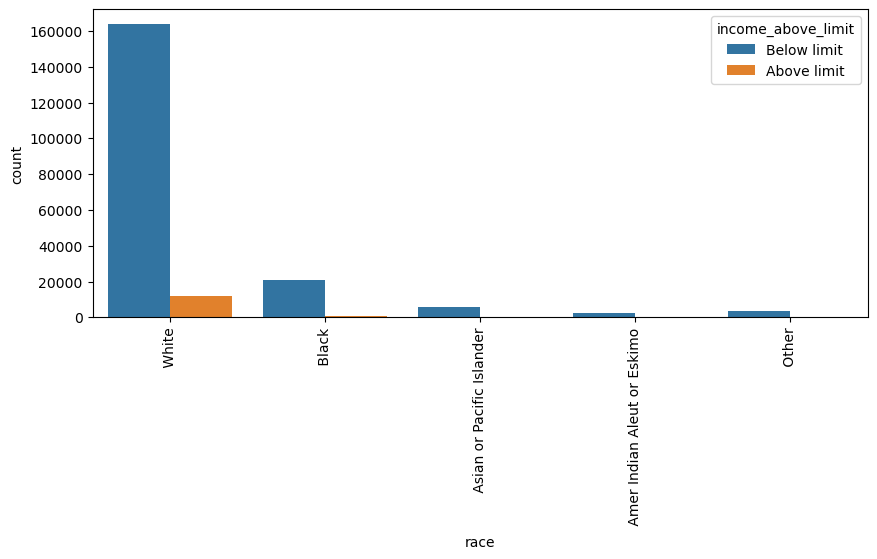

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.race,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

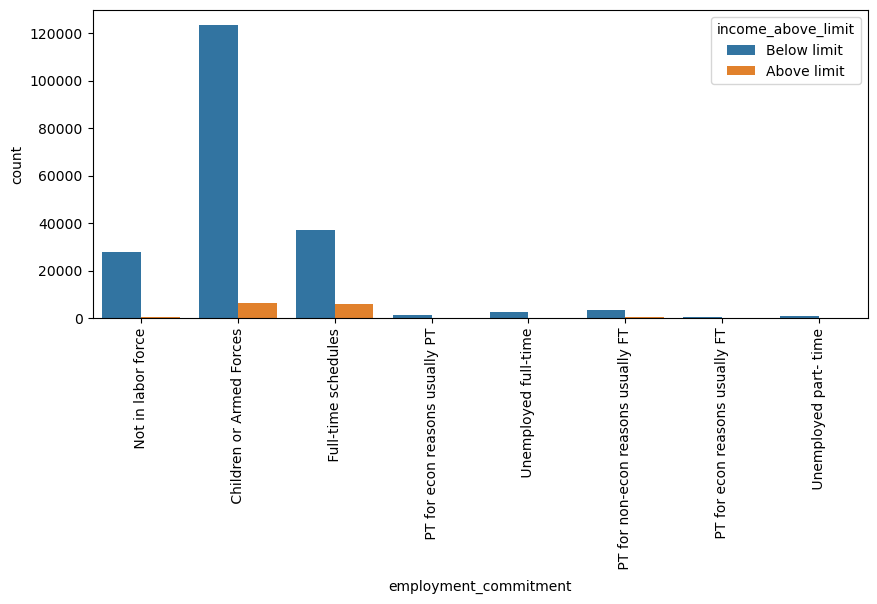

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.employment_commitment,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

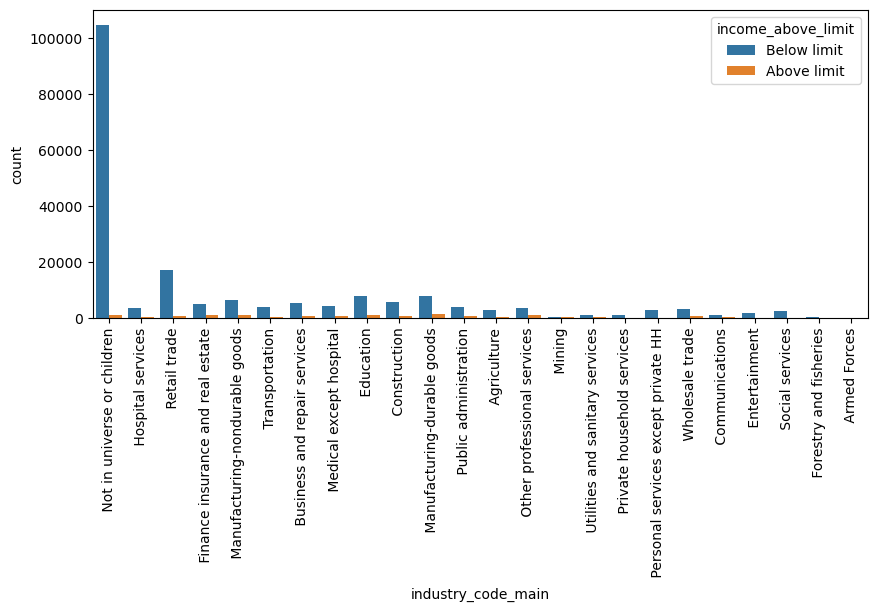

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.industry_code_main,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

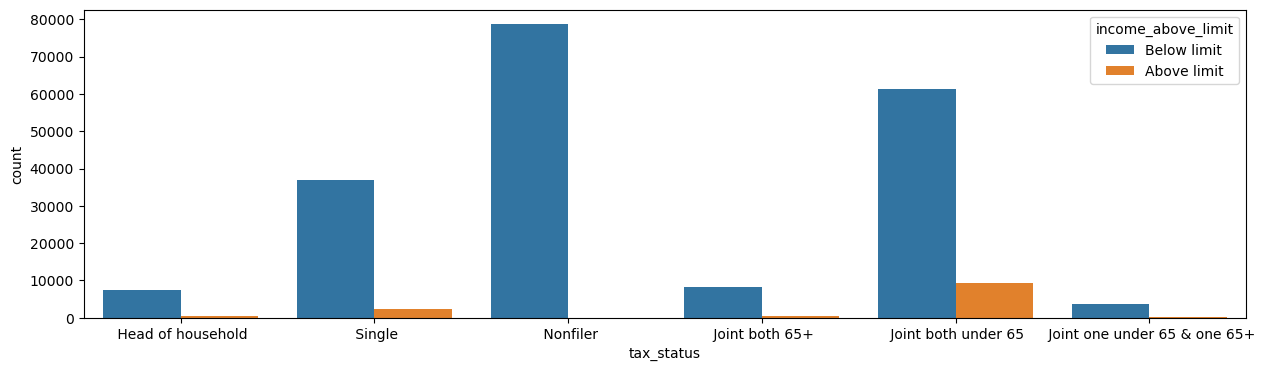

In [16]:
plt.figure(figsize=(15,4))
sns.countplot(x=train.tax_status,hue=train.income_above_limit)
plt.xticks(rotation=0)
plt.show()

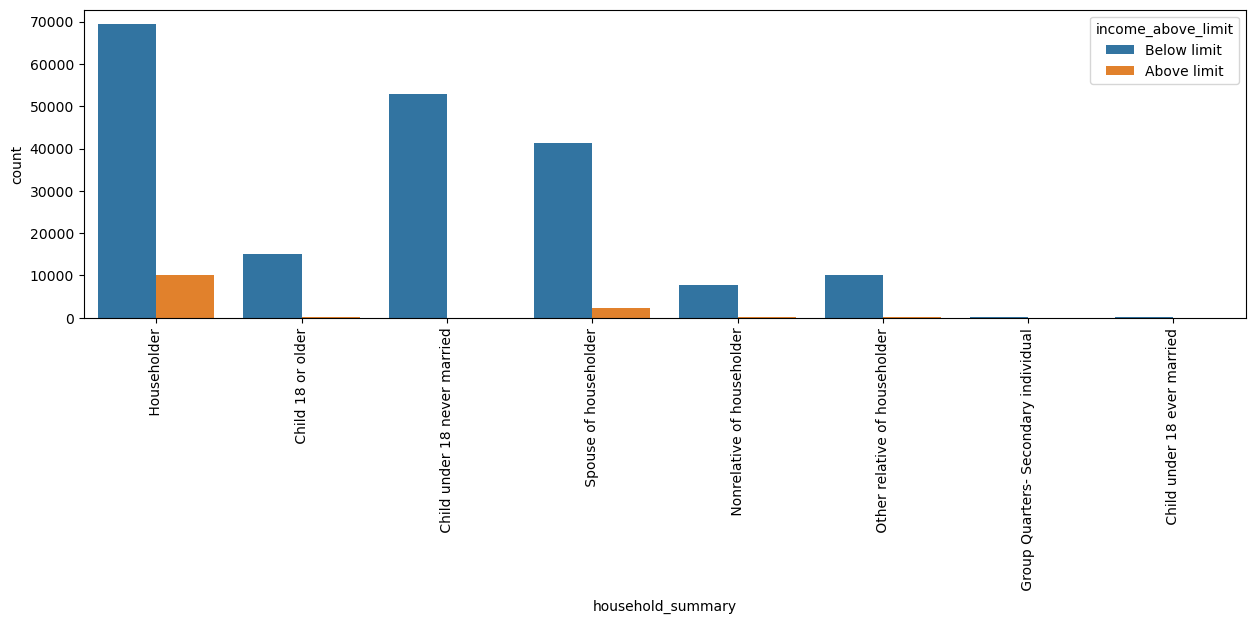

In [17]:
plt.figure(figsize=(15,4))
sns.countplot(x=train.household_summary,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

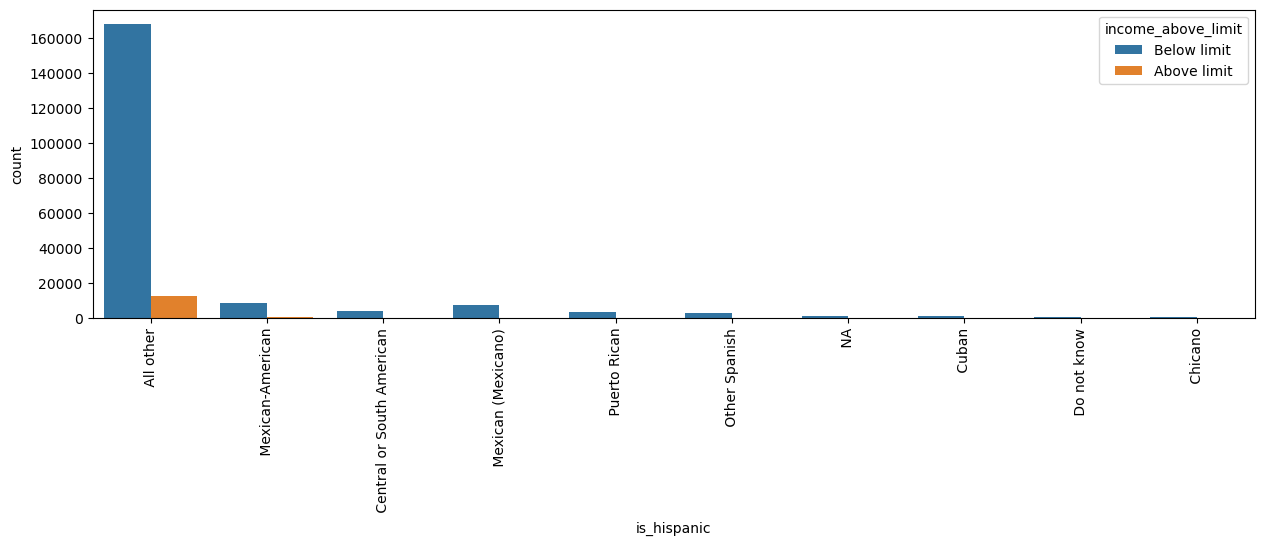

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(x='is_hispanic',hue='income_above_limit',data=train)
plt.xticks(rotation=90)
plt.show()

In [19]:
train.head()

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,under_18_family,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,residence_1_year_ago,old_residence_state,income_above_limit
0,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,...,NaN,2,Head of household,0,0,292,Native,NaN,NaN,Below limit
1,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,...,NaN,2,Single,0,0,0,Native,Same,NaN,Below limit
2,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,...,NaN,2,Single,0,0,0,Native,Same,NaN,Below limit
3,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,...,Both parents present,0,Nonfiler,0,0,0,Native,Same,NaN,Below limit
4,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,...,NaN,2,Joint both 65+,0,0,0,Native,NaN,NaN,Below limit


# Data Preparation for training

In [20]:
frames = [train, test]
df = pd.concat(frames)

In [21]:
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder()
df['gender']=x.fit_transform(df['gender'])
df['marital_status']=x.fit_transform(df['marital_status'])
df['citizenship']=x.fit_transform(df['citizenship'])
df['household_summary']=x.fit_transform(df['household_summary'])
df['tax_status']=x.fit_transform(df['tax_status'])
df['employment_commitment']=x.fit_transform(df['employment_commitment'])
df['race']=x.fit_transform(df['race'])
df['education']=x.fit_transform(df['education'])
df['is_hispanic']=x.fit_transform(df['is_hispanic'])
df['industry_code_main']=x.fit_transform(df['industry_code_main'])

df['class']=x.fit_transform(df['class'])
df['education_institute']=x.fit_transform(df['education_institute'])
df['unemployment_reason']=x.fit_transform(df['unemployment_reason'])
df['is_labor_union']=x.fit_transform(df['is_labor_union'])
df['occupation_code_main']=x.fit_transform(df['occupation_code_main'])
df['under_18_family']=x.fit_transform(df['under_18_family'])
df['residence_1_year_ago']=x.fit_transform(df['residence_1_year_ago'])
df['old_residence_state']=x.fit_transform(df['old_residence_state'])
df.income_above_limit[df.income_above_limit == 'Below limit'] = 0
df.income_above_limit[df.income_above_limit == 'Above limit'] = 1

C:\Users\PRANJUL GUPTA\AppData\Local\Temp\ipykernel_3732\3556159651.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income_above_limit[df.income_above_limit == 'Below limit'] = 0
C:\Users\PRANJUL GUPTA\AppData\Local\Temp\ipykernel_3732\3556159651.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income_above_limit[df.income_above_limit == 'Above limit'] = 1


In [22]:
df.head()

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,under_18_family,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,residence_1_year_ago,old_residence_state,income_above_limit
0,79,0,12,8,2,6,4,0,2,5,...,4,2,0,0,0,292,4,2,50,0
1,65,0,12,8,2,6,4,0,0,5,...,4,2,5,0,0,0,4,1,50,0
2,21,1,2,0,2,4,2,0,0,5,...,4,2,5,0,0,0,4,1,50,0
3,2,0,10,8,2,4,1,0,0,5,...,0,0,4,0,0,0,4,1,50,0
4,70,1,12,8,2,2,4,0,2,5,...,4,2,1,0,0,0,4,2,50,0


In [26]:
df.shape

(299285, 28)

In [27]:
train = df.iloc[:209499,:]
test = df.iloc[209499:,:]
xtrain = train.drop(['income_above_limit'], axis=1)
ytrain = train['income_above_limit']
xtest = test.drop(['income_above_limit'], axis=1)

In [28]:
xtrain.head()

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,household_summary,under_18_family,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,residence_1_year_ago,old_residence_state
0,79,0,12,8,2,6,4,0,2,5,...,4,4,2,0,0,0,292,4,2,50
1,65,0,12,8,2,6,4,0,0,5,...,4,4,2,5,0,0,0,4,1,50
2,21,1,2,0,2,4,2,0,0,5,...,0,4,2,5,0,0,0,4,1,50
3,2,0,10,8,2,4,1,0,0,5,...,2,0,0,4,0,0,0,4,1,50
4,70,1,12,8,2,2,4,0,2,5,...,7,4,2,1,0,0,0,4,2,50


In [30]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
col= ['age','wage_per_hour','employment_stat','working_week_per_year','total_employed','vet_benefit','gains','losses','stocks_status']
xtrain[col] = s.fit_transform(xtrain[col])
xtest[col] = s.fit_transform(xtest[col])

In [31]:
xtrain.head()

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,household_summary,under_18_family,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,residence_1_year_ago,old_residence_state
0,1.994078,0,12,8,2,6,4,0,2,5,...,4,4,0.569014,0,-0.092823,-0.136406,0.049820,4,2,50
1,1.366464,0,12,8,2,6,4,0,0,5,...,4,4,0.569014,5,-0.092823,-0.136406,-0.099436,4,1,50
2,-0.606039,1,2,0,2,4,2,0,0,5,...,0,4,0.569014,5,-0.092823,-0.136406,-0.099436,4,1,50
3,-1.457802,0,10,8,2,4,1,0,0,5,...,2,0,-1.781576,4,-0.092823,-0.136406,-0.099436,4,1,50
4,1.590612,1,12,8,2,2,4,0,2,5,...,7,4,0.569014,1,-0.092823,-0.136406,-0.099436,4,2,50


In [34]:
ytrain=ytrain.astype('int')

# Appyling Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=2000)

In [43]:
predictions=rf.predict(xtest)

In [49]:
ytest = pd.read_csv('results.csv')

In [50]:
ytest = ytest.drop(['ID'],axis=1)

In [51]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model:', round(accuracy_score(ytest,predictions)*100,2))

Accuracy of the model: 97.92
